<a href="https://colab.research.google.com/github/ksi81/Data-Science_HW_5/blob/main/hw_5_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('bestsellers with categories.csv')
print("Перші п'ять рядків:")
df.head()

Перші п'ять рядків:


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
print("\nРозмір датасету:")
df.shape


Розмір датасету:


(550, 7)

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
missing_values = df.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Відповідь: Чи є в якихось змінних пропуски? -- НІ

In [ ]:
unique_genres = df['genre'].unique()
print("Відповідь: Які є унікальні жанри?")
print(unique_genres)

Відповідь: Які є унікальні жанри?
['Non Fiction' 'Fiction']


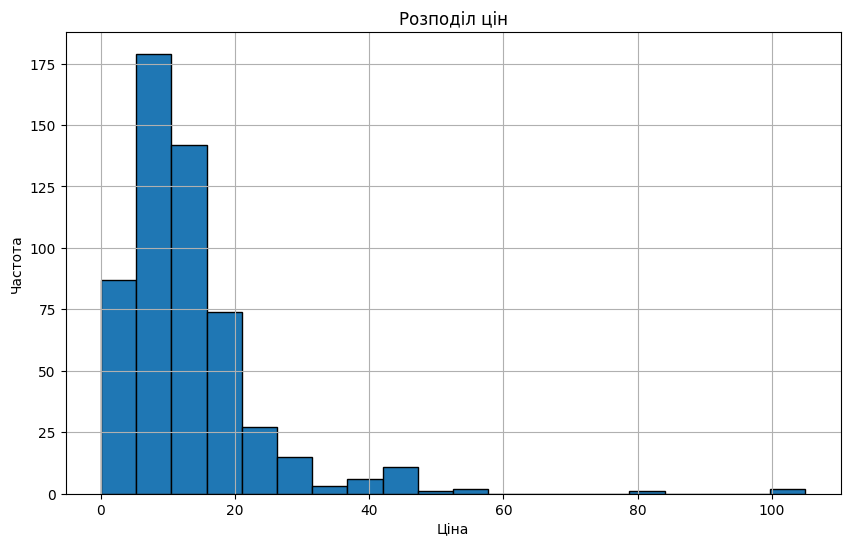

In [ ]:
import matplotlib.pyplot as plt
# Побудова гістограми розподілу цін
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [ ]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {max_rating}")


Найвищий рейтинг у датасеті: 4.9


In [ ]:
books_with_max_rating = df[df['user_rating'] == max_rating]
num_books_with_max_rating = books_with_max_rating.shape[0]
print(f"Кількість книг з найвищим рейтингом: {num_books_with_max_rating}")

Кількість книг з найвищим рейтингом: 52


In [ ]:
max_reviews = df['reviews'].max()
book_with_max_reviews = df[df['reviews'] == max_reviews]

print("Книга з найбільшою кількістю відгуків:")
print(book_with_max_reviews[['name', 'author', 'reviews']])


Книга з найбільшою кількістю відгуків:
                        name       author  reviews
534  Where the Crawdads Sing  Delia Owens    87841


In [ ]:
# Фільтрація датасету за роком (2015)
df_2015 = df[df['year'] == 2015]

# Вибір рядків, які потрапили до Топ-50 (можливо, вибірка за рейтингом)
top_50_2015 = df_2015.nlargest(50, 'user_rating')
print("ТОП книги, що потрапили до Топ-50 у 2015 році:")
print(top_50_2015[['name', 'user_rating','price']])

most_expensive_in_top_50_2015 = top_50_2015.nlargest(1, 'price')

print("\nНайдорожча книга з ТОП книг, що потрапили до Топ-50 у 2015 році:")
print(most_expensive_in_top_50_2015[['name', 'price']])


ТОП книги, що потрапили до Топ-50 у 2015 році:
                                                  name  user_rating  price
478                        The Very Hungry Caterpillar          4.9      5
248                          Oh, the Places You'll Go!          4.9      8
191  Jesus Calling: Enjoying Peace in His Presence ...          4.9      8
174                       Humans of New York : Stories          4.9     17
224                                   Love You Forever          4.8      5
123                               Giraffes Can't Dance          4.8      4
507                              To Kill a Mockingbird          4.8      0
447  The Pioneer Woman Cooks: Dinnertime - Comfort ...          4.8     14
437                           The Nightingale: A Novel          4.8     11
362                           The Day the Crayons Quit          4.8      9
352  The Boys in the Boat: Nine Americans and Their...          4.8     12
350                          The Book with No Picture

In [ ]:
top_50_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
# Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році
num_books_fiction_in_top_50_2010 = top_50_2010_fiction.shape[0]
print(f"Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році: {num_books_fiction_in_top_50_2010}")


Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році: 20


In [ ]:
top_50_2010_2011 = df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)]
num_books_rating_4_9_in_top_50_2010_2011 = top_50_2010_2011.shape[0]

print(f"Кількість книг з рейтингом 4.9, які потрапили до Топ-50 у 2010 та 2011 роках: {num_books_rating_4_9_in_top_50_2010_2011}")


Кількість книг з рейтингом 4.9, які потрапили до Топ-50 у 2010 та 2011 роках: 1


In [ ]:
top_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_top_2015_under_8 = top_2015_under_8.sort_values(by='price', ascending=True)

last_book_sorted = sorted_top_2015_under_8.tail(1)

print("Остання книга у відсортованому списку:")
print(last_book_sorted[['name', 'author', 'price']])


Остання книга у відсортованому списку:
                                      name       author  price
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney      7


**Агрегування даних та з'єднання таблиць**

In [ ]:
# Групування за жанрами та обчислення максимальної та мінімальної цін
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])

# Виведення результатів
print("Максимальна та мінімальна ціна для кожного з жанрів:")
print("Жанр Fiction:")
print(f"Максимальна ціна: {genre_prices.loc['Fiction', 'max']}")
print(f"Мінімальна ціна: {genre_prices.loc['Fiction', 'min']}")
print("\nЖанр Non Fiction:")
print(f"Максимальна ціна: {genre_prices.loc['Non Fiction', 'max']}")
print(f"Мінімальна ціна: {genre_prices.loc['Non Fiction', 'min']}")

Максимальна та мінімальна ціна для кожного з жанрів:
Жанр Fiction:
Максимальна ціна: 82
Мінімальна ціна: 0

Жанр Non Fiction:
Максимальна ціна: 105
Мінімальна ціна: 0


In [ ]:
# Групування за авторами та обчислення кількості книг для кожного автора
author_books_count = df.groupby('author')['name'].agg('count').reset_index()

print("Кількість книг для кожного з авторів:")
print(author_books_count)
print(f"\nРозмірність таблиці: {author_books_count.shape}")

max_books_author = author_books_count.loc[author_books_count['name'].idxmax()]

print(f"\nАвтор з найбільшою кількістю книг:")
print(f"Автор: {max_books_author['author']}")
print(f"Кількість книг: {max_books_author['name']}")


Кількість книг для кожного з авторів:
                         author  name
0              Abraham Verghese     2
1                Adam Gasiewski     1
2                 Adam Mansbach     1
3                     Adir Levy     1
4    Admiral William H. McRaven     1
..                          ...   ...
243             Walter Isaacson     3
244               William Davis     2
245            William P. Young     2
246            Wizards RPG Team     3
247                Zhi Gang Sha     2

[248 rows x 2 columns]

Розмірність таблиці: (248, 2)

Автор з найбільшою кількістю книг:
Автор: Jeff Kinney
Кількість книг: 12


In [ ]:
# Групування за авторами та обчислення середнього рейтингу для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index()

print("Середній рейтинг для кожного автора:")
print(author_avg_rating)

min_avg_rating_author = author_avg_rating.loc[author_avg_rating['user_rating'].idxmin()]

print(f"\nУ якого автора середній рейтинг мінімальний:")
print(f"Автор: {min_avg_rating_author['author']}, {min_avg_rating_author['user_rating']}")
print(f"Який у цього автора середній рейтинг?: {min_avg_rating_author['user_rating']}")


Середній рейтинг для кожного автора:
                         author  user_rating
0              Abraham Verghese     4.600000
1                Adam Gasiewski     4.400000
2                 Adam Mansbach     4.800000
3                     Adir Levy     4.800000
4    Admiral William H. McRaven     4.700000
..                          ...          ...
243             Walter Isaacson     4.566667
244               William Davis     4.400000
245            William P. Young     4.600000
246            Wizards RPG Team     4.800000
247                Zhi Gang Sha     4.600000

[248 rows x 2 columns]

У якого автора середній рейтинг мінімальний:
Автор: Donna Tartt, 3.9
Який у цього автора середній рейтинг?: 3.9


In [ ]:
merged_df = pd.concat([author_books_count, author_avg_rating['user_rating']], axis=1)

merged_df.columns = ['author', 'books_count', 'avg_rating']

sorted_merged_df = merged_df.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])

print("З'єднаний та відсортований датафрейм:")
print(sorted_merged_df)

first_author = sorted_merged_df.iloc[0]['author']
print(f"\nПерший автор у списку: {first_author}")


З'єднаний та відсортований датафрейм:
                                 author  books_count  avg_rating
171                      Muriel Barbery            1    4.000000
43                         Chris Cleave            1    4.100000
109                   Ian K. Smith M.D.            1    4.100000
186                        Pierre Dukan            1    4.100000
81                     Elizabeth Strout            1    4.200000
..                                  ...          ...         ...
11   American Psychological Association           10    4.500000
226                     Suzanne Collins           11    4.663636
92                         Gary Chapman           11    4.736364
197                        Rick Riordan           11    4.772727
120                         Jeff Kinney           12    4.800000

[248 rows x 3 columns]

Перший автор у списку: Muriel Barbery


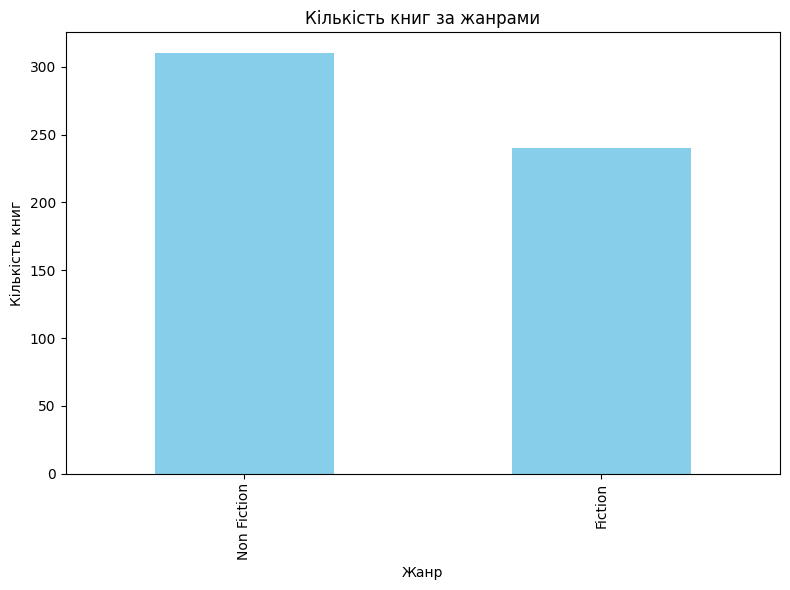

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Групування та підрахунок кількості книг за жанрами
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')

plt.title('Кількість книг за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')

plt.tight_layout()
plt.show()


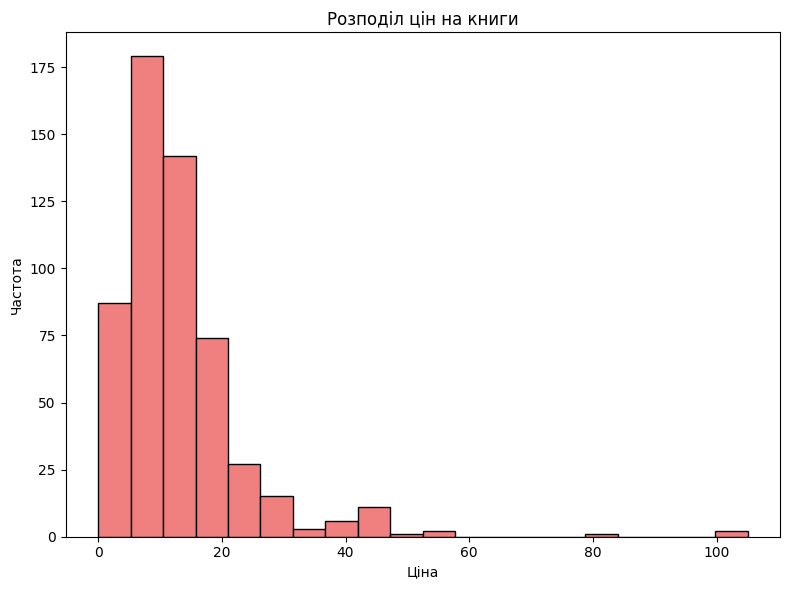

In [ ]:
plt.figure(figsize=(8, 6))

# Побудова гістограми розподілу цін на книги
plt.hist(df['price'], bins=20, color='lightcoral', edgecolor='black')

plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


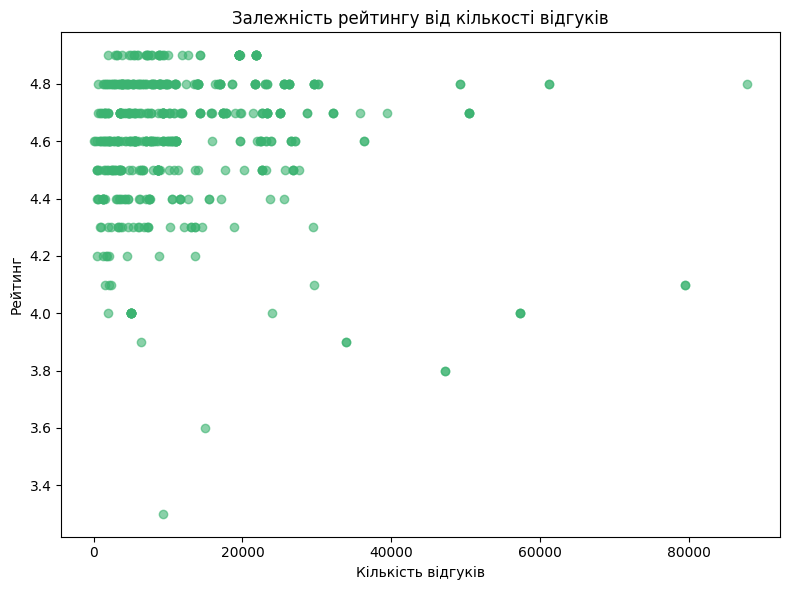

In [ ]:
plt.figure(figsize=(8, 6))

# Побудова точкової діаграми залежності рейтингу від кількості відгуків
plt.scatter(df['reviews'], df['user_rating'], color='mediumseagreen', alpha=0.6)

plt.title('Залежність рейтингу від кількості відгуків')
plt.xlabel('Кількість відгуків')
plt.ylabel('Рейтинг')

plt.tight_layout()
plt.show()


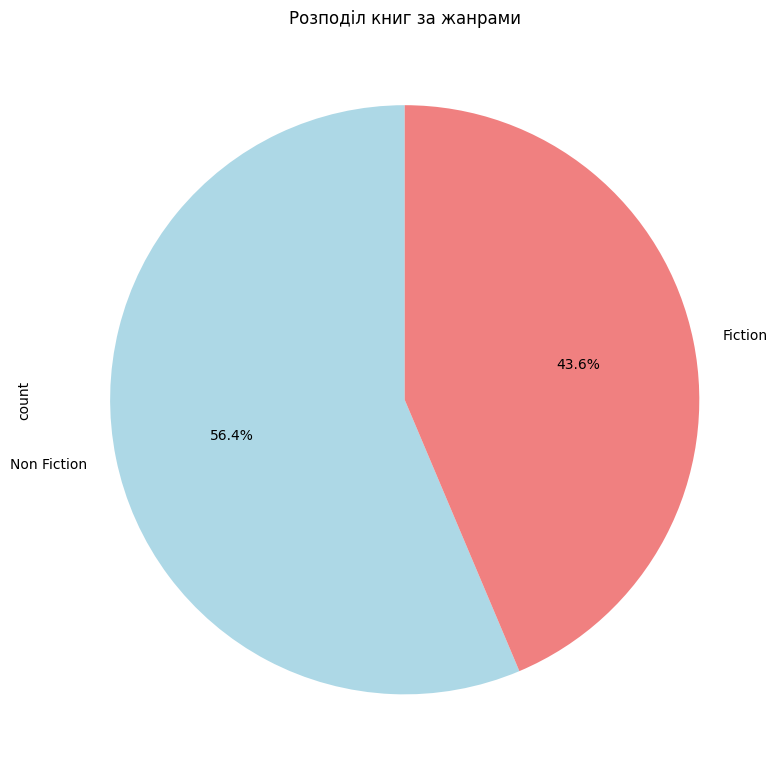

In [ ]:
plt.figure(figsize=(8, 8))

# Побудова кругової діаграми для розподілу книг за жанрами
genre_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)

plt.title('Розподіл книг за жанрами')
plt.tight_layout()
plt.show()


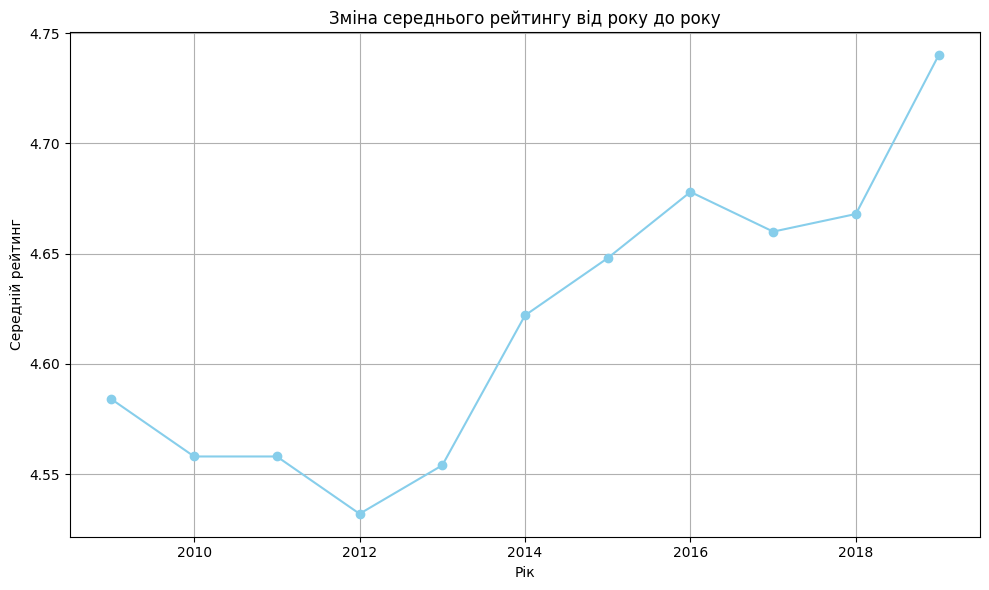

In [ ]:
plt.figure(figsize=(10, 6))


yearly_avg_rating = df.groupby('year')['user_rating'].mean()
yearly_avg_rating.plot(kind='line', marker='o', color='skyblue')

plt.title('Зміна середнього рейтингу від року до року')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг')

plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')